In [1]:
import sys
sys.path.insert(1, '/Users/madisonthantu/Desktop/DREAM/t-recs')

import trecs

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from collections import defaultdict
from chaney_utils import (
    load_sim_results,
    graph_relative_to_ideal,
    merge_results,
    graph_metrics,
    graph_metrics_by_axis
)
import warnings
warnings.simplefilter("ignore")

import itertools

/Users/madisonthantu/Desktop/DREAM/T-RECS-RS-research/param_experiments/chaney_utils.py:61: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if model_key is "ideal" and not absolute_measure:


In [2]:
DEBUG = True # don't save figures

In [3]:
results = merge_results(["param_exp_results/repeated_training", "param_exp_results/single_training"])
print(results.keys())

model_keys = ['0.0drift_0attention_0retraining', '0.0drift_0attention_1retraining', '0.0drift_-0.8attention_0retraining', '0.0drift_-0.8attention_1retraining', '0.05drift_0attention_0retraining', '0.05drift_0attention_1retraining', '0.05drift_-0.8attention_0retraining', '0.05drift_-0.8attention_1retraining', '0.1drift_0attention_0retraining', '0.1drift_0attention_1retraining', '0.1drift_-0.8attention_0retraining', '0.1drift_-0.8attention_1retraining']
print(model_keys)

id_to_readable = dict(zip(model_keys, model_keys))
print(id_to_readable)

dict_keys(['mse', 'interaction_spread', 'global_interaction_similarity', 'inter_cluster_interaction_similarity', 'intra_cluster_interaction_similarity'])
['0.0drift_0attention_0retraining', '0.0drift_0attention_1retraining', '0.0drift_-0.8attention_0retraining', '0.0drift_-0.8attention_1retraining', '0.05drift_0attention_0retraining', '0.05drift_0attention_1retraining', '0.05drift_-0.8attention_0retraining', '0.05drift_-0.8attention_1retraining', '0.1drift_0attention_0retraining', '0.1drift_0attention_1retraining', '0.1drift_-0.8attention_0retraining', '0.1drift_-0.8attention_1retraining']
{'0.0drift_0attention_0retraining': '0.0drift_0attention_0retraining', '0.0drift_0attention_1retraining': '0.0drift_0attention_1retraining', '0.0drift_-0.8attention_0retraining': '0.0drift_-0.8attention_0retraining', '0.0drift_-0.8attention_1retraining': '0.0drift_-0.8attention_1retraining', '0.05drift_0attention_0retraining': '0.05drift_0attention_0retraining', '0.05drift_0attention_1retraining': '0

In [4]:
results["global_interaction_similarity"].values()

dict_values([[[0.0016458292525323318, 0.0022942544573604866, 0.003094429171929703, 0.003897305658186603, 0.004699671095035131, 0.005468249440935591, 0.006325323530203141, 0.007122840033117577, 0.007942953339543398, 0.008754162949478434, 0.009794692982711932, 0.01092815160897466, 0.012208566007149684, 0.013386332184834253, 0.01458264236594256, 0.01535468791541127, 0.016325786233052118, 0.017134504716626024, 0.018092354006864604, 0.018779509342790726, 0.019509196668809698, 0.020157200925905564, 0.020774039717158684, 0.021281254870091908, 0.021764146680697937, 0.022118182859502938, 0.022498607050301888, 0.022882622843003065, 0.023177978447796413, 0.023398663698516533, 0.02369849486663063, 0.023923248714902652, 0.024093744052420835, 0.02429566759245221, 0.02448409346138009, 0.02461597892087706, 0.024711174355298526, 0.024825086706451747, 0.024923853369658567, 0.02497429282985281, 0.025027005943569013, 0.025090862722629777, 0.025136895711770513, 0.025247316718660942, 0.02533887528312653, 0.

In [5]:
hyper_params = {"drift":[0.0, 0.05, 0.1], "attention_exp":[0, -0.8], "repeated_training":[0,1]}
models = dict([(f"{p[0]}drift_{p[1]}attention_{p[2]}retraining", p) for p in itertools.product(*hyper_params.values())])

results_df = pd.DataFrame(columns=["drift", "attention_exp", "repeated_training"] + list(results.keys()))
results_df

for params in model_keys:
    df = pd.DataFrame(columns=["drift", "attention_exp", "repeated_training"] + list(results.keys()))
    for metric in results:
        metric_results = [vals for sim_trial in results[metric][params] for vals in sim_trial]
        df[metric] = metric_results
    df["drift"] = models[params][0]
    df["attention_exp"] = models[params][1]
    df["repeated_training"] = models[params][2]
    results_df = pd.concat([results_df, df])

In [6]:
results_df.head()
# len(models)

,drift,attention_exp,repeated_training,mse,interaction_spread,global_interaction_similarity,inter_cluster_interaction_similarity,intra_cluster_interaction_similarity
0,0.0,0,0,0.090065,-939.5,0.001646,0.001501,0.001917
1,0.0,0,0,0.090065,0.0,0.002294,0.002121,0.002618
2,0.0,0,0,0.090065,1.5,0.003094,0.002878,0.003501
3,0.0,0,0,0.090065,-0.5,0.003897,0.003679,0.004307
4,0.0,0,0,0.090065,-0.5,0.004700,0.004449,0.005170


['0.0drift_0attention_0retraining', '0.0drift_-0.8attention_0retraining', '0.05drift_0attention_0retraining', '0.05drift_-0.8attention_0retraining', '0.1drift_0attention_0retraining', '0.1drift_-0.8attention_0retraining']


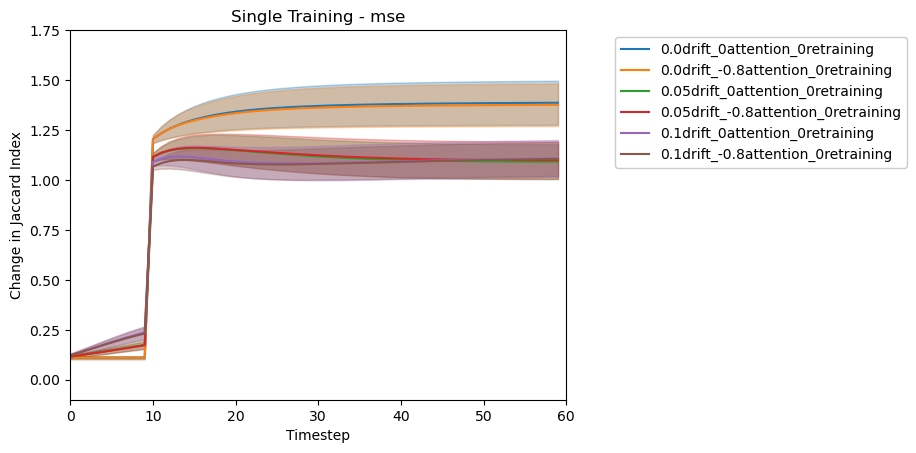

In [7]:
single_training_keys = ['0.0drift_0attention_0retraining', '0.0drift_-0.8attention_0retraining', '0.05drift_0attention_0retraining', '0.05drift_-0.8attention_0retraining', '0.1drift_0attention_0retraining', '0.1drift_-0.8attention_0retraining']
print(single_training_keys)

metric_key = "mse"
# graph_relative_to_ideal(results, "mse", single_training_keys, id_to_readable, absolute_measure=False, mult_sd=1.0)
graph_metrics(results, metric_key, single_training_keys, id_to_readable, mult_sd=0.5)
plt.ylabel("Change in Jaccard Index")
plt.xlabel("Timestep")
plt.legend(facecolor='white', framealpha=1, loc='upper right', bbox_to_anchor=(1.7, 1.0))
plt.ylim(-0.1, 1.75)
plt.xlim(0, 60)
plt.title(f"Single Training - {metric_key}")
if not DEBUG:
    plt.savefig("figures/repeated_training_sim_pair.pdf", bbox_inches = "tight")

['0.1drift_-0.8attention_1retraining', '0.1drift_0attention_1retraining', '0.05drift_0attention_1retraining', '0.0drift_0attention_1retraining', '0.05drift_-0.8attention_1retraining', '0.0drift_-0.8attention_1retraining']


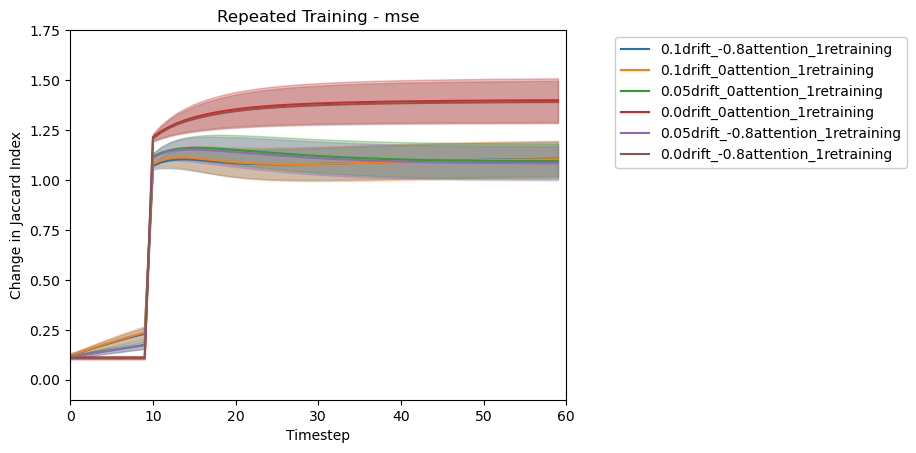

In [8]:
repeated_training_keys = list(set(model_keys) - set(single_training_keys))
print(repeated_training_keys)

metric_key = "mse"
# graph_relative_to_ideal(results, "mse", single_training_keys, id_to_readable, absolute_measure=False, mult_sd=1.0)
graph_metrics(results, metric_key, repeated_training_keys, id_to_readable, mult_sd=0.5)
plt.ylabel("Change in Jaccard Index")
plt.xlabel("Timestep")
plt.legend(facecolor='white', framealpha=1, loc='upper right', bbox_to_anchor=(1.7, 1.0))
plt.ylim(-0.1, 1.75)
plt.xlim(0, 60)
plt.title(f"Repeated Training - {metric_key}")
if not DEBUG:
    plt.savefig("figures/repeated_training_sim_pair.pdf", bbox_inches = "tight")

In [30]:
model_key_pairs = [(model_keys[i], model_keys[i+1]) for i in range(0, len(model_keys), 2)]

In [32]:
results.keys()

dict_keys(['mse', 'interaction_spread', 'global_interaction_similarity', 'inter_cluster_interaction_similarity', 'intra_cluster_interaction_similarity'])

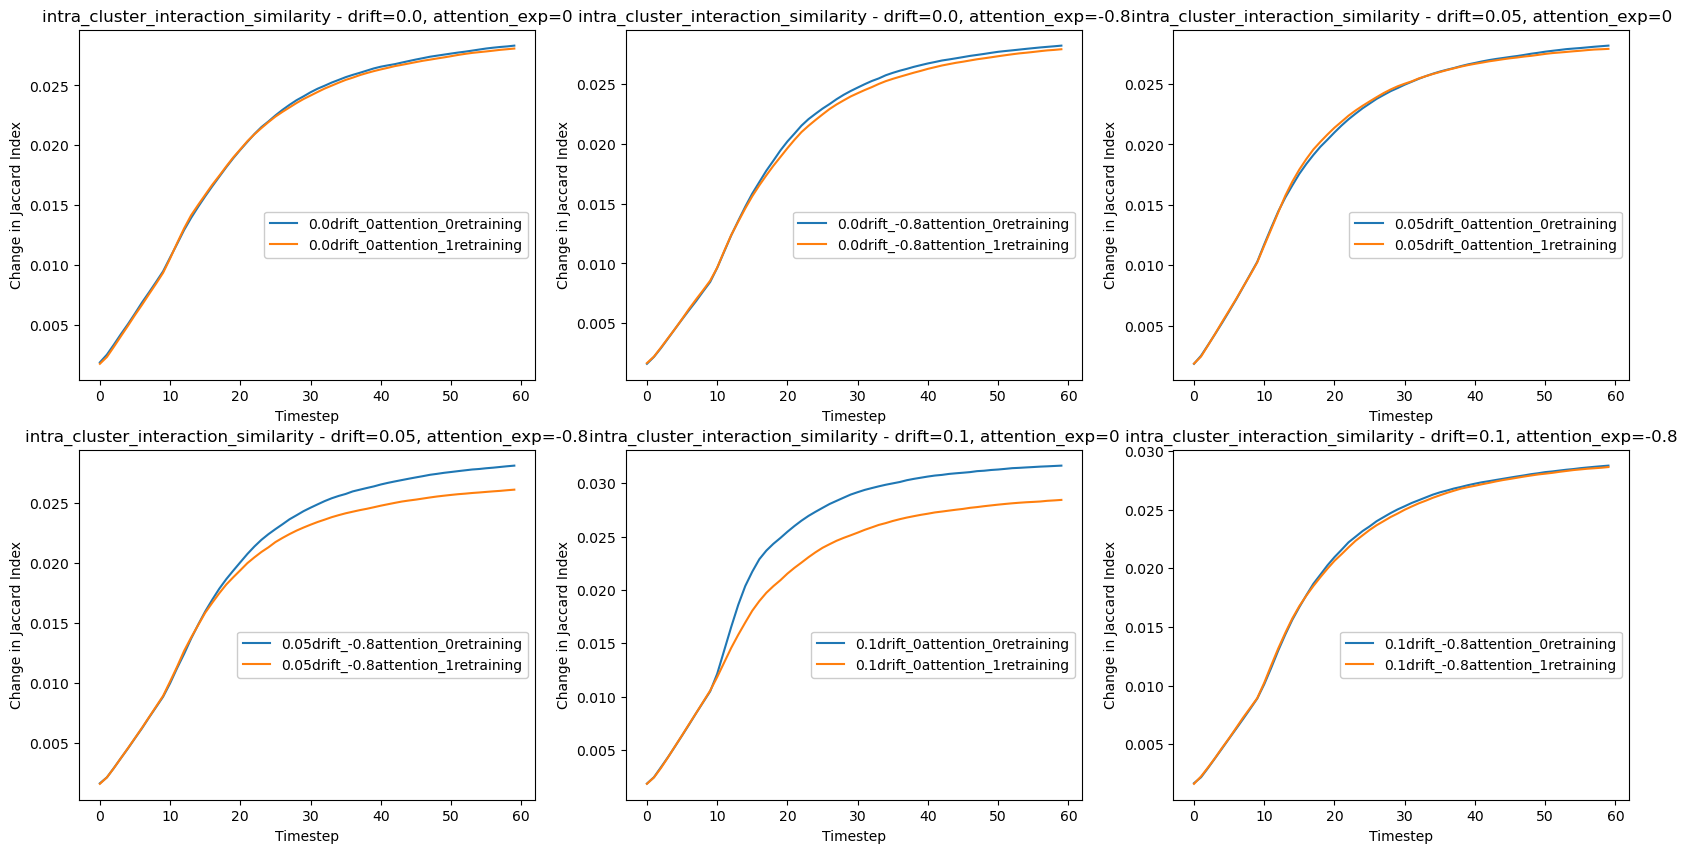

In [36]:
metric_key = "intra_cluster_interaction_similarity"

graphing_keys = model_key_pairs[3]

fig, axs = plt.subplots(2, 3, figsize=(20, 10))

for i in range(len(model_key_pairs)):
    curr_ax = axs[int(i >= 3), i%3]
    graph_metrics_by_axis(curr_ax, results, metric_key, model_key_pairs[i], id_to_readable, mult_sd=0)
    curr_ax.set_ylabel("Change in Jaccard Index")
    curr_ax.set_xlabel("Timestep")
    curr_ax.set_title(f"{metric_key} - drift={models[model_key_pairs[i][0]][0]}, attention_exp={models[model_key_pairs[i][0]][1]}")

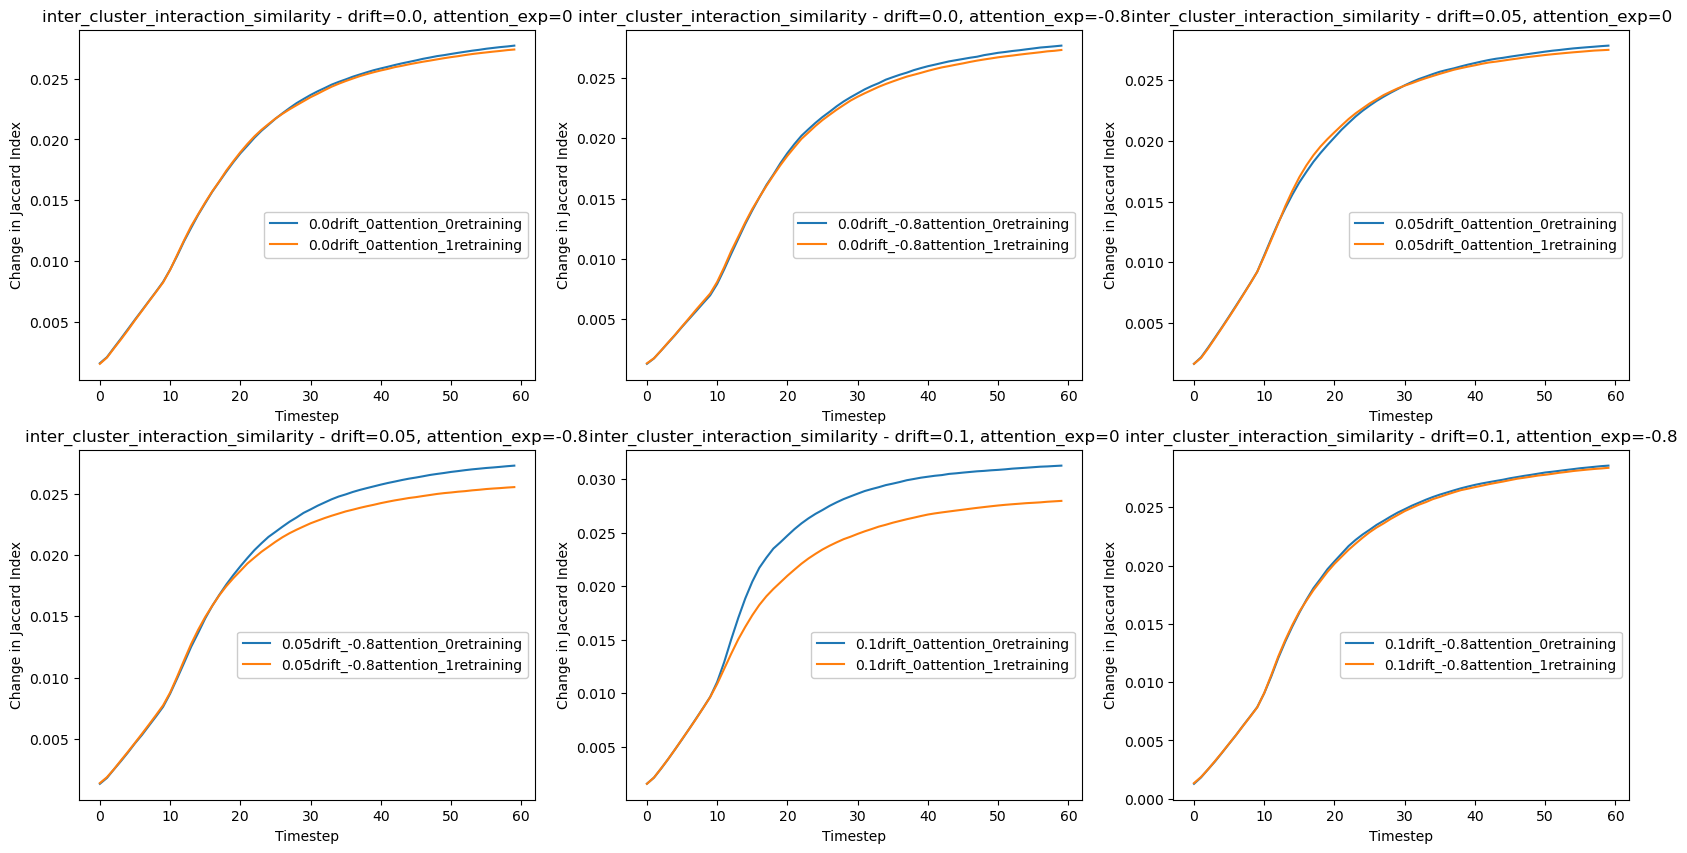

In [37]:
metric_key = "inter_cluster_interaction_similarity"

graphing_keys = model_key_pairs[3]

fig, axs = plt.subplots(2, 3, figsize=(20, 10))

for i in range(len(model_key_pairs)):
    curr_ax = axs[int(i >= 3), i%3]
    graph_metrics_by_axis(curr_ax, results, metric_key, model_key_pairs[i], id_to_readable, mult_sd=0)
    curr_ax.set_ylabel("Change in Jaccard Index")
    curr_ax.set_xlabel("Timestep")
    curr_ax.set_title(f"{metric_key} - drift={models[model_key_pairs[i][0]][0]}, attention_exp={models[model_key_pairs[i][0]][1]}")